# Midterm Exam
## Due Thursday, March 21st

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: 15pts - Given the function

$$
y(x) = \sin^{3}(x),
$$

1a) 6pts - Use 

$$
\sin^{2}(x) = \frac{1 - \cos(2x)}{2},
$$ 

since $\sin^{3}(x) = \sin(x)\sin^{2}(x)$, and 

$$
\sin(x)\cos(2x) = \frac{1}{2}\left(\sin(3x) - \sin(x)\right)
$$

to find a Taylor series around $x_{0}=0$ of $\sin^{3}(x)$.  

1b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.  

1c) 3pts - Plot this function on the interval $[0,\pi]$.  Provide log plots of the error in your approximation for tolerance values $10^{-2}$, $10^{-4}$, and $10^{-8}$.  Comment on the behavior of your approximations for increasing values of $x$ and for decreasing tolerances.  Note graphs should be well labeled, with legends, and well sized.  

_ Answer to Problem 1 _

1a. 
 
$$
\begin{align}
& f(x) = \sin^{3}(x) = \sin(x)\sin^{2}(x) \\
& = \sin(x)\Big(\frac{1-\cos(2x)}{2}\Big) \\
& = \frac{1}{2}\Big[\sin(x)\big(1-\cos(2x)\big)\Big] \\
& = \frac{1}{2}\Big[\sin(x)-\sin(x)\cos(2x)\Big] \\
& = \frac{1}{2}\Big[\sin(x)-\frac{1}{2}\big(\sin(3x)-\sin(x)\big)\Big] \\
& = \frac{1}{2}\Big[\frac{3}{2}\sin(x)-\frac{1}{2}\sin(3x)\Big] \\
& = \frac{3}{4}\sin(x) - \frac{1}{4}\sin(3x) \\
\end{align}
$$

$$
T(x;x_{0}=0) = f(0) + f'(0)\frac{(x-0)}{1!} + f''(0)\frac{(x-0)^{2}}{2!} + ...
$$

$$
\begin{align}
& f(x) = \frac{3}{4}\sin(x) - \frac{1}{4}\sin(3x) \implies f(0) = 0 \\
& f'(x) = \frac{3}{4}\cos(x) - \frac{3}{4}\cos(3x) \implies f'(0) = 0 \\
& f''(x) = -\frac{3}{4}\sin(x) + \frac{9}{4}\sin(3x) \implies f'(0) = 0\\
& f'''(x) = -\frac{3}{4}\cos(x) + \frac{27}{4}\cos(3x) \implies f'''(0) = 6\\
& f^{4}(x) = \frac{3}{4}\sin(x) - \frac{81}{4}\sin(3x) \implies f^{4}(0) = 0\\
& f^{5}(x) = \frac{3}{4}\cos(x) - \frac{243}{4}\cos(3x) \implies f^{5}(0) = -60\\
& f^{6}(x) = -\frac{3}{4}\sin(x) + \frac{729}{4}\sin(3x) \implies f^{6}(0) = 0\\
& f^{7}(x) = -\frac{3}{4}\cos(x) + \frac{2187}{4}\cos(3x) \implies f^{7}(0) = 546\\
& f^{8}(x) = \frac{3}{4}\sin(x) - \frac{6561}{4}\sin(3x) \implies f^{8}(0) = 0\\
& f^{8}(x) = \frac{3}{4}\cos(x) - \frac{19683}{4}\cos(3x) \implies f^{9}(0) = -4920\\
\end{align}
$$

$$
\begin{align}
& T(x;x_{0}=0) = \frac{f^{3}(0)}{3!}x^{3} + \frac{f^{5}(0)}{5!}x^{5} + \frac{f^{7}(0)}{7!}x^{7} + \frac{f^{9}(0)}{9!}x^{9} + ... \\
& = \frac{6}{3!}x^{3} - \frac{60}{5!}x^{5} + \frac{546}{7!}x^{7} - \frac{4920}{9!}x^{9} + ...\\
\end{align}
$$

$$
\begin{align}
& \sin^{3}(x) = \frac{3}{4}\sin(x) - \frac{1}{4}\sin(3x) \\
& = \frac{3}{4}\sum_{n=0}^{\infty} \frac{(-1)^{n}x^{2n+1}}{(2n+1)!} - \frac{1}{4}\sum_{n=0}^{\infty}\frac{(-1)(3x)^{2n+1}}{(2n+1)!}\\
\end{align}
$$

In [2]:
#1b. - Functions
def taylor_approximation_of_sin_x(x, tol): #sin(x)
    an = np.array(x) #when n = 0
    total = np.array(x) #when n = 0
    n = 1.
    x_squared = x**2
    while (np.max(np.abs(an))) > tol:
        an *= -x_squared/((2.*n+1)*(2.*n))
        total += an
        n +=1
    return total

def taylor_approximation_of_sin_3x(x, tol): #sin^(3x)
    an = np.array(3*x) #When n = 0
    total = np.array(3*x) #When n = 0
    n = 1.
    x_squared = x**2
    while (np.max(np.abs(an)))>tol:
        an *= -9*x_squared/((2.*n+1)*(2.*n))
        total += an
        n +=1
    return total

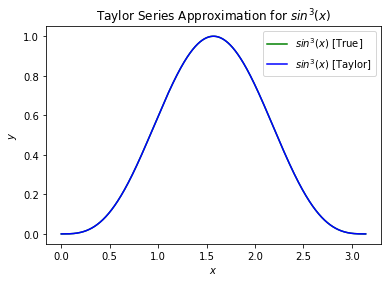

In [3]:
#1b. - Continued (Plotted Graph of Taylor Approx of sin^{3}(x))
xvals = np.linspace(0, np.pi, int(1e5))

a = (3./4.) #constants
b = (1./4.) #constants

yvals = a*taylor_approximation_of_sin_x(xvals, 1e-4)-b*taylor_approximation_of_sin_3x(xvals, 1e-4)

plt.plot(xvals, (np.sin(xvals)**3), color = 'g', ls = '-', label = '$sin^{3}(x)$ [True]')
plt.plot(xvals,yvals, color = 'b', ls ='-', label = '$sin^{3}(x)$ [Taylor]')

plt.title('Taylor Series Approximation for $sin^{3}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

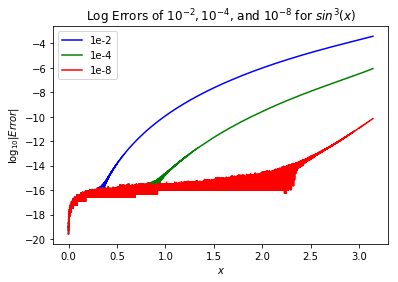

In [4]:
#1c. - Plotted Log Errors for sin^{3}(x)
xvals = np.linspace(0, np.pi, int(1e5))
TRUEyvals = (3./4.)*np.sin(xvals)-(1./4.)*np.sin(3*xvals)
a = (3./4.) #constants
b = (1./4.) #constants

yvals1 = a*taylor_approximation_of_sin_x(xvals, 1e-2)-b*taylor_approximation_of_sin_3x(xvals, 1e-2)
yvals2 = a*taylor_approximation_of_sin_x(xvals, 1e-4)-b*taylor_approximation_of_sin_3x(xvals, 1e-4)
yvals3 = a*taylor_approximation_of_sin_x(xvals, 1e-8)-b*taylor_approximation_of_sin_3x(xvals, 1e-8)

error1 = np.ma.log10(np.abs(TRUEyvals-yvals1))
error2 = np.ma.log10(np.abs(TRUEyvals-yvals2))
error3 = np.ma.log10(np.abs(TRUEyvals-yvals3))

plt.plot(xvals, error1, color = 'b', ls = '-', label = '1e-2')
plt.plot(xvals, error2, color = 'g', ls = '-', label = '1e-4')
plt.plot(xvals, error3, color = 'r', ls = '-', label = '1e-8')

plt.title('Log Errors of $10^{-2}, 10^{-4}$, and $10^{-8}$ for $sin^{3}(x)$')
plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')
plt.legend()

#It appears that the red line (1e-8) appears to be "fuzzy" and that all three lines shy away
#from eachother on [1, 2] and statrt to approach eachother on [2.5, ...]

** Problem 2 **: 8pts - Find the first 40 terms of a sequence defined by

2a) 6pts

$$
a_{n+1} = \left\{
\begin{array}{rl}
\frac{1}{2} a_{n} & \text{if} ~ a_{n} ~ \text{is an even number} \\
3a_{n} + 1 & \text{if} ~ a_{n} ~ \text{is an odd number}
\end{array}
\right.
$$

and $a_1 = 11$

2b) 2pts

Do the same for $a_1 = 25$. Make a conjecture about this type of sequence.

_ Answer to Problem 2 _

$$
\begin{align}
& n=0: a_{0+1} = a_{1} = 11 \\
& n=1: a_{1} = 11 \implies a_{n+1} = 3a_{n}+1 \implies a_{1+1} = 3a_{1}+1 \implies a_{2} = 3(11) + 1 = 34 \implies a_{2} = 34\\
& n=2: a_{2} = 34 \implies a_{n+1} = \frac{1}{2}a_{n} \implies a_{2+1} = \frac{1}{2}a_{2} \implies a_{3} = \frac{1}{3}(34) \implies a_{3} = 17 \\
\end{align}
$$

In [5]:
#2a. 
def general_sequence(startingVal, n): 
    #user must enter starting point and the endpoint
    a = np.ones(n)
    a[0] = startingVal
    for i in xrange(1, n): 
    # a[i-1] = previous element, a[i] = current(or next) element
        if a[i-1] % 2 == 0:       
            a[i] = (1./2.)*a[i-1]   
        elif a[i-1] % 2 != 0:
            a[i] = 3.*a[i-1] + 1.
    # i = 0: a[0] = 11
    # i = 1: a[1-1] = a[0] = 11 --> a[1] = 3*(11) + 1 = 34
    # i = 2: a[2-1] = a[1] = 34 --> a[2] = (1/2)*34 = 17
    # i = 3: a[3-1] = a[2] = 17 --> a[3] = 3*(17) + 1 = 52
    # .
    # .
    # .
    # i = i: a[i-1] = EVEN --> a[i] = (1/2)*a[i-1]
    # OR!
    # i = 1: a[i-1] = ODD --> a[i] = 3*a[i-1] + 1
    return a

In [6]:
#2a. - Continued
general_sequence(11, 40)

array([11., 34., 17., 52., 26., 13., 40., 20., 10.,  5., 16.,  8.,  4.,
        2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,
        1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,
        4.])

In [7]:
#2b. 
general_sequence(25, 40)

array([25., 76., 38., 19., 58., 29., 88., 44., 22., 11., 34., 17., 52.,
       26., 13., 40., 20., 10.,  5., 16.,  8.,  4.,  2.,  1.,  4.,  2.,
        1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,  4.,  2.,  1.,
        4.])

In [8]:
#2b - Continued (Comments)
#It appears that the sequences presents a pattern of [4, 2, 1, 4, 2, 1, ...]
#For a_{1} = 11, it looks like that the pattern starts at element 12
#For a_{1} = 25, it looks like that the pattern starts at 21

** Problem 3 **: 12pts - Given the following sum


$$
y(n) =  \sum_{n=0}^{\infty} \frac{(-1)^{n}\pi^{2n+1}}{4^{2n+1}(2n+1)!}
$$

3a) 3pts - Determine a recurrence relation between the coefficients.

3b) 5pts - In Python, develop a tolerance based, recursive, vectorized implementation of this sum and find the limit as $n\rightarrow \infty$ of the function $y(n)$. Provide a plot to support your answer (for tolerance $10^{-4}$ and $10^{-8}$). 
 

3d) 4pts -  For the recurrence relation

$$
p_{n} = 3p_{n-1} + p_{n-2}, ~ n\geq 2, 
$$

where 

$$
p_{0}= 0, ~ p_{1}=1, 
$$

plot $p_{n}$ for $0\leq n \leq 15$?


_ Answer to Problem 3 _

3a.
$$
\begin{align}
& a_{n} = \frac{(-1)^{n}\pi^{2n+1}}{4^{2n+1}(2n+1)!} \\
& a_{n-1} = \frac{(-1)^{n-1}\pi^{2(n-1)+1}}{4^{2(n-1)+1}(2(n-1)+1)!} = \frac{(-1)^{n-1}\pi^{2n-1}}{4^{2n-1}(2n-1)!} \\
& \frac{a_{n}}{a_{n-1}} = \frac{(-1)^{n}\pi^{2n+1}}{4^{2n+1}(2n+1)!} \frac{(-1)^{n-1}\pi^{2n-1}}{4^{2n-1}(2n-1)!} = \frac{\pi^{1}\pi^{1}(-1)^{-1}}{4^{1}4^{1}(2n+1)(2n)} = \frac{-\pi^{2}}{16(2n+1)(2n)}\\
& \implies a_{n} = \frac{-\pi^{2}a_{n-1}}{16(2n+1)(2n)}\\
& \implies a_{n} = \left\{\begin{array}{rl}  
\frac{-\pi^{2}a_{n-1}}{16(2n+1)(2n)}, & n\geq 1, \\ 
\frac{\pi}{4}, & n=0.
\end{array}\right.
\end{align}
$$

In [9]:
#3b. - Function
def summation_of_y(n, tol):
    pi = np.pi #When n = 0
    an = pi/4. #When n = 0 
    total = pi/4.
    #counter = 1 
    while (np.max(abs(an))) > tol:
        an *= (-pi**2) / (16*(2*n+1)*(2*n))
        total += an
        #counter += 1
    return total

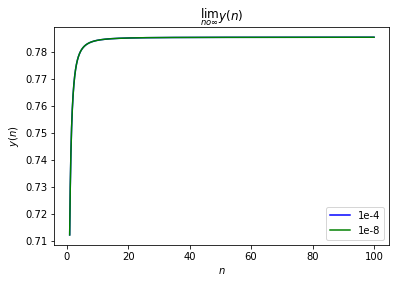

In [10]:
#3b - Continued (Plotted Function)
xvals = np.linspace(1, 100, int(1e5))
yvals1 = summation_of_y(xvals, 1e-4)
yvals2 = summation_of_y(xvals, 1e-8)

plt.plot(xvals, yvals1, color = 'b', ls = '-', label = '1e-4')
plt.plot(xvals, yvals2, color = 'g', ls = '-', label = '1e-8')

plt.title('$\lim_{n \to \infty} y(n)$')
plt.xlabel('$n$')
plt.ylabel('$y(n)$')
plt.legend()

In [11]:
#3c. - Recurrence Relation
def reccurence_relation_of_p(n):    
    p = np.ones(n+1)
    p[0] = 0
    p[1] = 1
    for n in xrange(2, n+1):
        p[n] = 3*p[n-1] + p[n-2]
        #p[2] = 3*p[2-1] + p[2-2]
        #     = 3*p[1] + p[0]
        #     = 3*(1) + 0 
        #     = 3
        #p[3] = 3*p[3-1] + p[3-2]
        #     = 3*p[2] + p[1]
        #     = 3*(3) + 1 
        #     = 10
        #p[4] = 3*p[4-1] + p[4-2]
        #     = 3*p[3] + p[2]
        #     = 3*(10) + 13
        #     = 33
        # .
        # .
        # .
        #p[n] = 3*p[n-1] + p[n-2]
    return p

In [12]:
#3c.- Continued
reccurence_relation_of_p(4)
#reccurence_relation_of_p(15)

array([ 0.,  1.,  3., 10., 33.])

Text(0,0.5,'$P_{n}$')

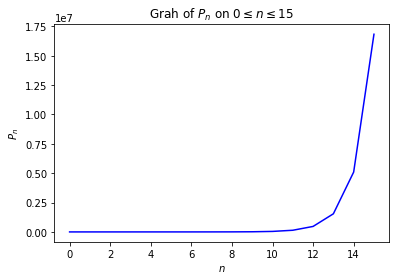

In [13]:
#3c. - Continued (Plotted Relation)
plt.plot(reccurence_relation_of_p(15), color = 'b', ls = '-')

plt.title('Grah of $P_{n}$ on 0$\leq$$n$$\leq$15 ')
plt.xlabel('$n$')
plt.ylabel('$P_{n}$')

** Problem 4** 9pts: 
    
4a) 4pts - Write a Python program to find the number $n$ that satisfies
$$
 \sum_{i=1}^{n} i = 78
$$ 
   

4b) 5pts - Using a **non-vectorization**, find the limit as $n\rightarrow \infty$ of the function $f(n)$ where  

$$
f(n) = \sum_{j=1}^{n} \frac{3}{n} \left[ \left(1 + \frac{3j}{n}\right)^{3} - 2\left(1 + \frac{3j}{n}\right) \right]
$$

Provide a plot to support your answer.  



In [14]:
#4a.
def find_n(a): #user enters a numbner 'a' that represents the sum of i from j = 1 to n in order to find the value of n
    total = 0
    i = 1
    while total < a: 
        #other test values besides 78 include: 1, 3, 6, 10, 15, 21, ...
        total += i
        i += 1
        #i = 1: total = 0 + 1 = 1
        #i = 2 : total = 1 + 2 = 3
        #i = 3: total = 1 + 3 = 4
        #.
        #.
        #.
        #i = n: total = total + i
        n = i-1
    return n #returns the value of 'n' that satisfies the problem
find_n(78) # a = 78

12

In [15]:
#4b.
def limit_of_f(n):
    total = 0
    n = n
    for j in xrange(1, int(n)+1):
        if total != 48.76:
            firstChunk = (1+((3*j)/n))**3
            secondChunk = 2*(1+((3*j)/n))
            total += firstChunk - secondChunk
    return (3/n)*total

Text(0,0.5,'$f(n)$')

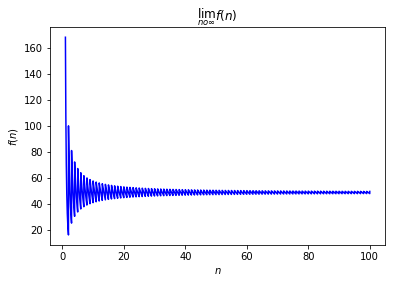

In [16]:
#4b - Continued (Plotted Function)
xvals = np.linspace(1, 100, int(1e4))
yvals = [limit_of_f(jj) for jj in xvals]

plt.plot(xvals, yvals, color = 'b', ls = '-')

plt.title('$\lim_{n \to \infty} f(n)$')
plt.xlabel('$n$')
plt.ylabel('$f(n)$')

** Problem 5** 6pts: We can generate a 3n+1 sequence as follows

- Start with a positive integer n.

- If n = 1, stop.

- If n is even, replace it with n/2.

- If n is odd, replace it with 3n+1.

So if we started with $n=3$, then we would generate the sequence

$$
3, 10, 5, 16, 8, 4, 2, 1
$$

it is unknown whether there are any starting values $n$ which generate a sequence which goes on for forever.  Thus, an interesting associated quantity we would want to know is how many terms a given value of $n$ generates via the $3n+1$ sequence.  We call this number $L(n)$.  For example then, using our example of $n=3$ above, we have that 

$$
L(3)  = 8
$$

Write a code to figure out how to find $L(n)$ and then generate a plot of $L(n)$ for $1\leq n \leq 1000$.  Discuss any trends you observe.  




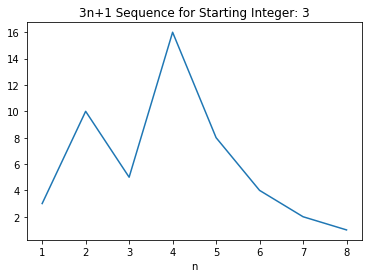

In [17]:
#5. 
def threeNplusOneSequence(n): # I am just using this as a reference and a guide for the solution of this problem.
    n0 = n
    tnp1 = np.array([n])
    while n > 1:
        if n%2==0:
            n = n/2
        else :
            n = 3*n + 1
        tnp1 = np.append(tnp1,n)
    
    nvals = range(1,tnp1.size+1)
    plt.plot(nvals,tnp1)
    plt.xlabel('n')
    plt.title('3n+1 Sequence for Starting Integer: %d' %n0)
threeNplusOneSequence(3)

In [18]:
#5. - Continued
def Ln_maker(n):    #This will generate the NUMBER OF TERMS via the 3n+1 sequence when the user inputs a value for n 
                    #into the function.
    n0 = n
    tnp1 = np.array([n])
    while n > 1:
        if n%2==0:
            n = n/2
        else :
            n = 3*n + 1
        tnp1 = np.append(tnp1,n)
    
    nvals = range(1,tnp1.size+1)
    Ln = len(tnp1)
    return Ln

In [19]:
#5. - Continued
Ln_maker(3) #use this function to check if the 'n' value corresponds with the correct number of terms.
            #use this to compare the 'n' values from the graphs below.

8

In [20]:
#5. - Continued
def Ln_plotter(a, b): #user enters the end points for a <= n <= b
    xvals = xrange(a, b+1)
    yvals = [Ln_maker(jj) for jj in xvals]
    #return yvals
    plt.scatter(xvals, yvals, color = 'b', marker = 'o')
    plt.xlabel('$n$')
    plt.ylabel('$L(n)$')
    plt.title('$L(n)$ for 1$\leq$$n$$\leq$ '+ `b`)

In [21]:
#5. - Continued
a = 1 #starting point
b1 = 5  #test value
b2 = 10 #test value
b3 = 15 #test value
b4 = 1000 #value from question 5.

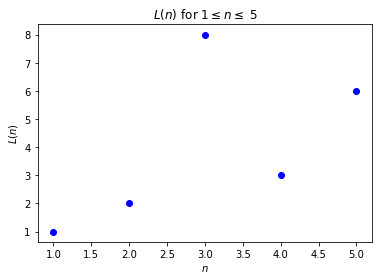

In [22]:
#5. - Continued
Ln_plotter(a, b1) #b1 = 5

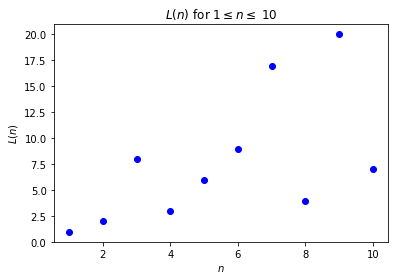

In [23]:
#5. - Continued
Ln_plotter(a, b2) #b2 = 10

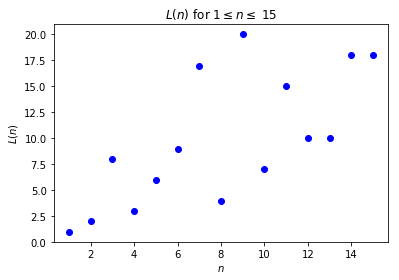

In [24]:
#5. - Continued
Ln_plotter(a, b3) #b3 = 15

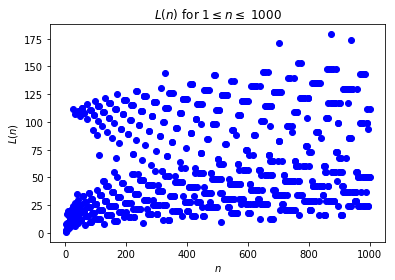

In [25]:
#5. - Continued
Ln_plotter(a, b4) #b4 = 1000

In [26]:
#5. - Continued (Comments)
#It seems taht when I increase the invterval, the number of points plotted on the graph increase.
#I decided to use a scatter plot, because it is much easier to read the graph.
#It appears that the graph for L(n) for 1<=n<= 100 has a low-positive correlation. 
#The number of points are very dense(close together) in the bottom-left part of the graph.